<a href="https://colab.research.google.com/github/EstherWhang/jpm_changepoint/blob/main/testing_algs/ruptures_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ruptures Changepoint Detection Algorithms

This notebook serves as a means for us to experiment and test the different ruptures algorithms

In [25]:
#todo: make a bunch of synthetic time series datasets and test rupture algorithms on them

In [26]:
#Esther Whang - just do things until it breaks
#Binary Segmentation (https://github.com/deepcharles/ruptures/blob/master/docs/user-guide/detection/binseg.md)
#Bottom-up segmentation (https://github.com/deepcharles/ruptures/blob/master/docs/user-guide/detection/bottomup.md)
#Dynamic Programming (https://github.com/deepcharles/ruptures/blob/master/docs/user-guide/detection/dynp.md)

#Hoda Moustafa
#Kernel change point detection (https://github.com/deepcharles/ruptures/blob/master/docs/user-guide/detection/kernelcpd.md)
#Linearly penalized segmentation (https://github.com/deepcharles/ruptures/blob/master/docs/user-guide/detection/pelt.md)
#Window-based change point detection (https://github.com/deepcharles/ruptures/blob/master/docs/user-guide/detection/window.md)

In [27]:
#one thing to do- check compatability, that the format of the data works with the rupture stuff as well, or use the data generator
#libraries provided by ruptures library

# Set-up

Setting up the data. Install the ruptures library if not already installed and import the libraries needed.

In [28]:
!pip install ruptures

You should consider upgrading via the 'c:\users\emw\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [29]:
import matplotlib.pyplot as plt  # for display purposes
import numpy as np
import ruptures as rpt  # our package

# Generate sample data 

Data is generated through the ruptures library, some common variables: 

- n/n_samples: the max range of data points
- n_dims: the number of sets of data to be generated
- sigma: how big the change point is. The smaller the value, the bigger the jump is.
- n_bkps: the number of breaks in the data to indicate the changepoint. 
    - 1: range is a random point - n_samples
    - 2: range is (point1, point2) --> indicates the changepoint period
    - n: range is (p1,p2) , (p3,p4), ... (p(n-1) , pn)




## Types of data 

All data types return:
- signal: the number of samples used
- bkps: the specified points

### **Piecewise constant** (pw_constant):
- Uses a sigma value to generate noise 


### **Piecewise linear** (pw_linear):
- Creates a linear combination of covariants (guassain random variables)

### **Piecewise 2D Gaussian** (pw_normal):
- Creates 2d signal of Guassian signal

### **Piecewise sinusoidal** (pw_wavy):
- Creates simulates a sum-of-sine signal

[191, 406, 602, 809, 1000]


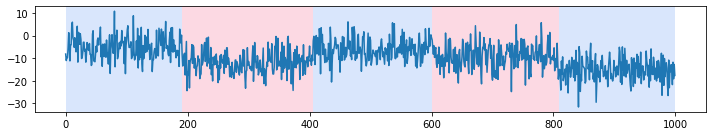

In [30]:
# piecewise constant data 
n_samples, n_dims, sigma = 1000, 1, 5
n_bkps = 4  # number of breakpoints
signal_c, bkps_c = rpt.pw_constant(n_samples, n_dims, n_bkps, noise_std=sigma)

print(bkps_c) # prints the breakpoint values, the start and end of the changepoint range
fig, ax_array = rpt.display(signal_c, bkps_c)


[210, 412, 606, 798, 1000]


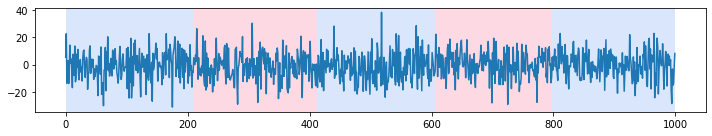

In [31]:
#piecewise linear data
n, dim, sigma = 1000, 0, 10  # number of samples, dimension of the covariates, noise standart deviation
n_bkps = 4  # number of change points
signal_l, bkps_l = rpt.pw_linear(n, dim, n_bkps, noise_std=sigma)

print(bkps_l) # prints the breakpoint values, the start and end of the changepoint range
fig, ax_array = rpt.display(signal_l, bkps_l)

[98, 192, 296, 401, 500]


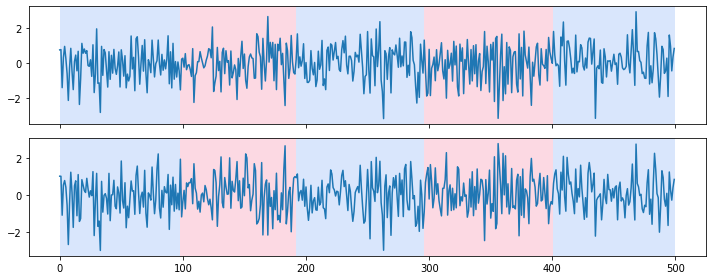

In [32]:
#normal data (Piecewise 2D Gaussian )
n = 500  # number of samples
n_bkps = 4  # number of change points, noise standart deviation
signal_n, bkps_n = rpt.pw_normal(n, n_bkps)

print(bkps_n) # prints the breakpoint values, the start and end of the changepoint range
fig, ax_array = rpt.display(signal_n, bkps_n)

[97, 190, 297, 396, 500]


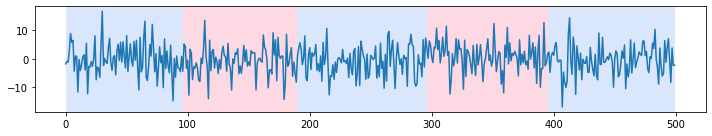

In [33]:
#wavy data (Piecewise sinusoidal signal)
n = 500 # number of samples, dimension
n_bkps, sigma = 4, 5  # number of change points, noise standart deviation
signal_w, bkps_w = rpt.pw_wavy(n, n_bkps, noise_std=sigma)

print(bkps_w) # prints the breakpoint values, the start and end of the changepoint range
fig, ax_array = rpt.display(signal_w, bkps_w)

# Algorithms Comparison

## Binary Segmentation

Piecewise constant data: --------------------------------------
Result for Bin Seg:  [190, 400, 805, 1000]


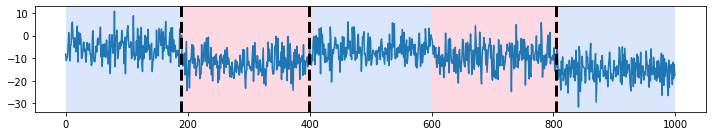

Piecewise linear data: --------------------------------------
Result for Bin Seg:  [450, 570, 660, 990, 1000]


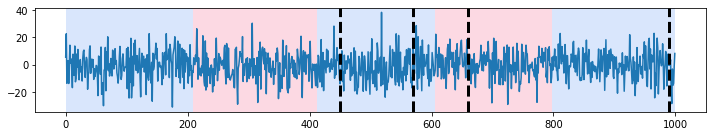

Piecewise 2D Gaussian data: --------------------------------------
Result for Bin Seg:  [60, 395, 435, 445, 500]


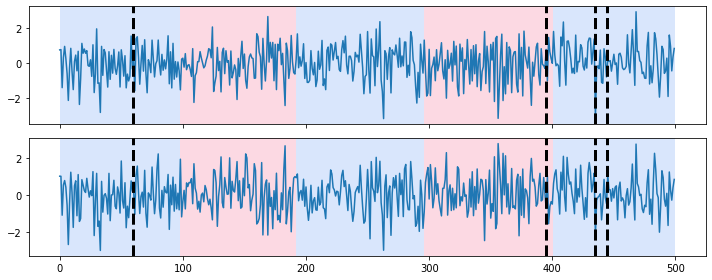

Piecewise sinusoidal data: --------------------------------------
Result for Bin Seg:  [75, 265, 405, 410, 500]


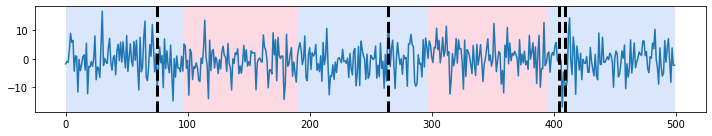

In [34]:
#constant data
model = "l2"  # "l1", "rbf", "linear", "normal", "ar",...
algo_bin = rpt.Binseg(model=model).fit(signal_c)
result_c = algo_bin.predict(n_bkps=3)

print("Piecewise constant data: --------------------------------------")
print("Result for Bin Seg: ", result_c )
rpt.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_bin  = rpt.Binseg(model="l2").fit(signal_l)
result_l = algo_bin.predict(n_bkps=4)

print("Piecewise linear data: --------------------------------------")
print("Result for Bin Seg: ", result_l)

rpt.display(signal_l, bkps_l, result_l)
plt.show()

#normal data 
algo_bin  = rpt.Binseg(model="l2").fit(signal_n)
result_n = algo_bin.predict(n_bkps=4)

print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for Bin Seg: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data 
algo_bin  = rpt.Binseg(model="l2").fit(signal_w)
result_w = algo_bin.predict(n_bkps=4)

print("Piecewise sinusoidal data: --------------------------------------")
print("Result for Bin Seg: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

## Bottom-up segmentation

Piecewise constant data: --------------------------------------
Result for Bottom-up segmentation:  [195, 405, 810, 1000]


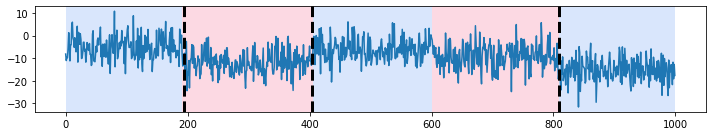

Piecewise linear data: --------------------------------------
Result for Bottom-up segmentation:  [60, 65, 520, 530, 1000]


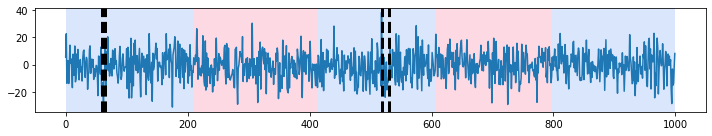

Piecewise 2D Gaussian data: --------------------------------------
Result for Bottom-up segmentation:  [125, 160, 180, 435, 500]


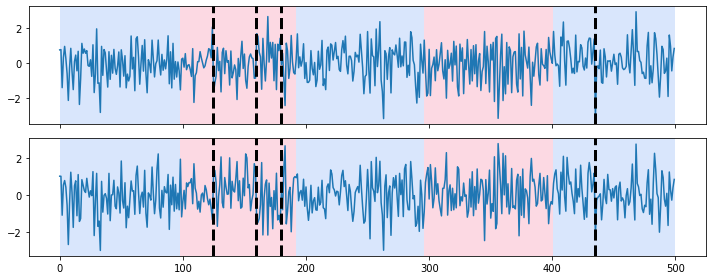

Piecewise sinusoidal data: --------------------------------------
Result for Bottom-up segmentation:  [295, 315, 405, 410, 500]


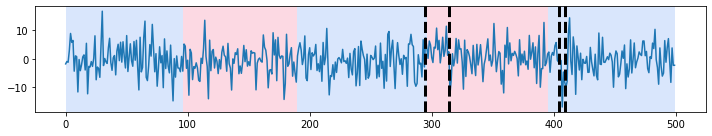

In [35]:
#constant data
model = "l2"  # "l1", "rbf", "linear", "normal", "ar",...
algo_BU = rpt.BottomUp(model=model).fit(signal_c)
result_c = algo_BU.predict(n_bkps=3)

print("Piecewise constant data: --------------------------------------")
print("Result for Bottom-up segmentation: ", result_c )
rpt.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_BU = rpt.BottomUp(model="l2").fit(signal_l)
result_l = algo_BU.predict(n_bkps=4)

print("Piecewise linear data: --------------------------------------")
print("Result for Bottom-up segmentation: ", result_l)

rpt.display(signal_l, bkps_l, result_l)
plt.show()

#normal data 
algo_BU = rpt.BottomUp(model="l2").fit(signal_n)
result_n = algo_BU.predict(n_bkps=4)

print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for Bottom-up segmentation: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data 
algo_BU = rpt.BottomUp(model="l2").fit(signal_w)
result_w = algo_BU.predict(n_bkps=4)

print("Piecewise sinusoidal data: --------------------------------------")
print("Result for Bottom-up segmentation: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

## Dynamic Programming
(l1)?

Piecewise constant data: --------------------------------------
Result for Dynamic Segmentation l1:  [190, 405, 605, 805, 1000]


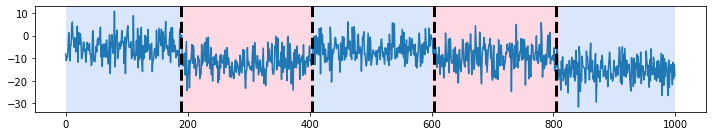

Piecewise linear data: --------------------------------------
Result for Dynamic Segmentation l1:  [165, 180, 475, 555, 1000]


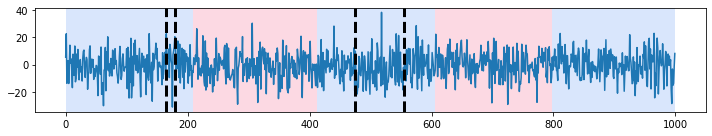

Piecewise 2D Gaussian data: --------------------------------------
Result for Dynamic Segmentation l1:  [160, 180, 220, 275, 500]


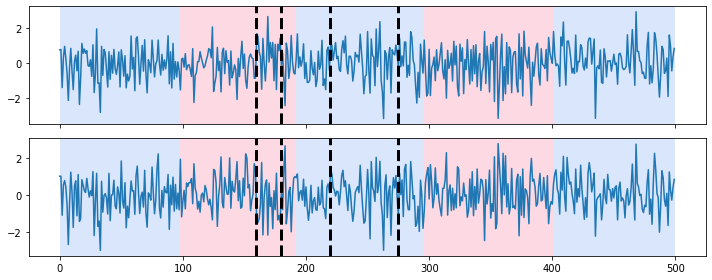

Piecewise sinusoidal data: --------------------------------------
Result for Dynamic Segmentation l1:  [280, 285, 295, 315, 500]


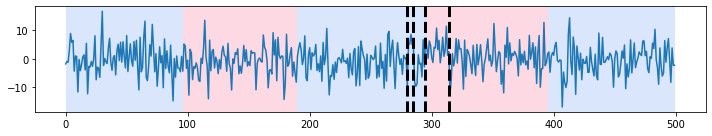

In [36]:
#linear 
#constant data

algo_linear = rpt.Dynp(model="l1").fit(signal_c)
result_c = algo_linear.predict(n_bkps=4)

print("Piecewise constant data: --------------------------------------")
print("Result for Dynamic Segmentation l1: ", result_c)

rpt.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_linear = rpt.Dynp(model="l1").fit(signal_l)
result_l = algo_linear.predict(n_bkps=4)

print("Piecewise linear data: --------------------------------------")
print("Result for Dynamic Segmentation l1: ", result_l)

rpt.display(signal_l, bkps_l, result_l)
plt.show()

#normal data 
algo_linear = rpt.Dynp(model="l1").fit(signal_n)
result_n = algo_linear.predict(n_bkps=4)

print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for Dynamic Segmentation l1: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data 
algo_linear = rpt.Dynp(model="l1").fit(signal_w)
result_w = algo_linear.predict(n_bkps=4)

print("Piecewise sinusoidal data: --------------------------------------")
print("Result for Dynamic Segmentation l1: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

## Kernel change point detection

Has 3 model types: l2 (linear), rbf (guassian), cosine


#### pw_constant data:
- rbf and linear most accurate
- cosine not accurate, data points were too close to each other and couldn't correctly predict the changepoint values.

Piecewise constant data: --------------------------------------
Result for KCP linear:  [195, 405, 605, 805, 1000]


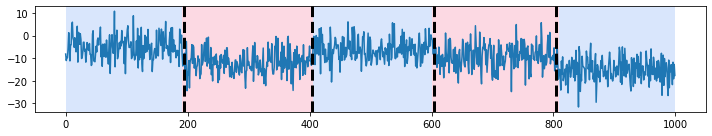

Piecewise linear data: --------------------------------------
Result for KCP linear:  [145, 220, 520, 530, 1000]


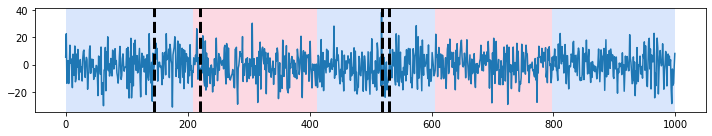

Piecewise 2D Gaussian data: --------------------------------------
Result for KCP linear:  [120, 125, 160, 180, 500]


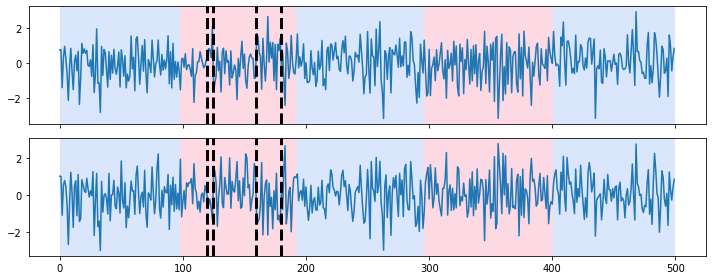

Piecewise sinusoidal data: --------------------------------------
Result for KCP linear:  [295, 315, 405, 410, 500]


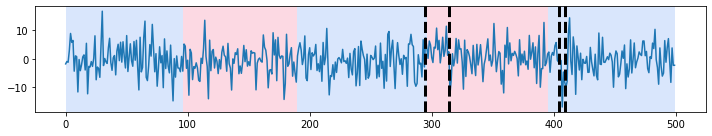

In [37]:
#linear 
#constant data

algo_linear = rpt.Dynp(model="l2").fit(signal_c)
result_c = algo_linear.predict(n_bkps=4)

print("Piecewise constant data: --------------------------------------")
print("Result for KCP linear: ", result_c)

rpt.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_linear = rpt.Dynp(model="l2").fit(signal_l)
result_l = algo_linear.predict(n_bkps=4)

print("Piecewise linear data: --------------------------------------")
print("Result for KCP linear: ", result_l)

rpt.display(signal_l, bkps_l, result_l)
plt.show()

#normal data 
algo_linear = rpt.Dynp(model="l2").fit(signal_n)
result_n = algo_linear.predict(n_bkps=4)

print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for KCP linear: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data 
algo_linear = rpt.Dynp(model="l2").fit(signal_w)
result_w = algo_linear.predict(n_bkps=4)

print("Piecewise sinusoidal data: --------------------------------------")
print("Result for KCP linear: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

Piecewise constant data: --------------------------------------
Result for KCP guassian:  [186, 376, 572, 793, 1000]


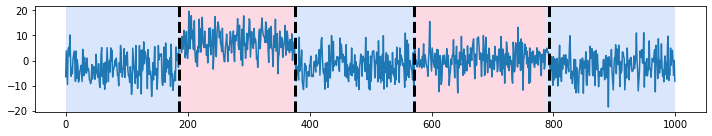

Piecewise linear data: --------------------------------------
Result for KCP guassian:  [59, 193, 196, 237, 1000]


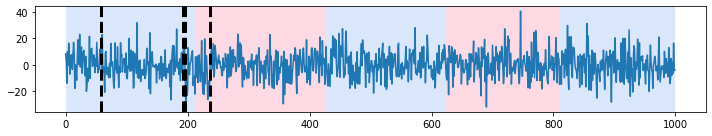

Piecewise 2D Gaussian data: --------------------------------------
Result for KCP guassian:  [100, 103, 439, 442, 500]


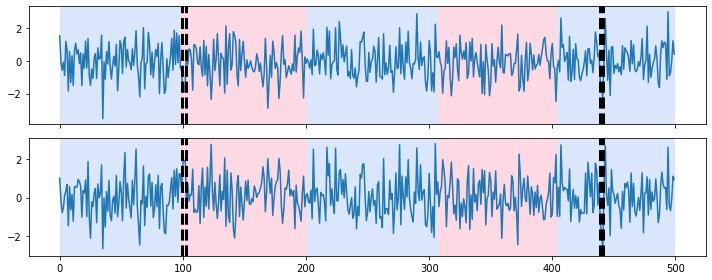

Piecewise sinusoidal data: --------------------------------------
Result for KCP guassian:  [6, 24, 63, 497, 500]


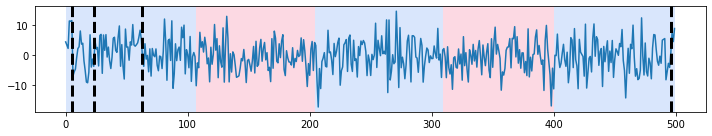

In [14]:
#guassian 
#constant data
params = {"gamma": 1e-2}
algo_guassian = rpt.Dynp(model="rbf", params=params, jump=1, min_size=2).fit(signal_c)
result_c = algo_guassian.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for KCP guassian: ", result_c )

rpt.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_guassian = rpt.Dynp(model="rbf", params=params, jump=1, min_size=2).fit(signal_l)
result_l = algo_guassian.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for KCP guassian: ", result_l )

rpt.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_guassian = rpt.Dynp(model="rbf", params=params, jump=1, min_size=2).fit(signal_n)
result_n = algo_guassian.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for KCP guassian: ", result_n )

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
algo_guassian = rpt.Dynp(model="rbf", params=params, jump=1, min_size=2).fit(signal_w)
result_w = algo_guassian.predict(n_bkps=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for KCP guassian: ", result_w )

rpt.display(signal_w, bkps_w, result_w)
plt.show()

Piecewise constant data: --------------------------------------
Result for KCP cosine:  [180, 375, 665, 795, 1000]


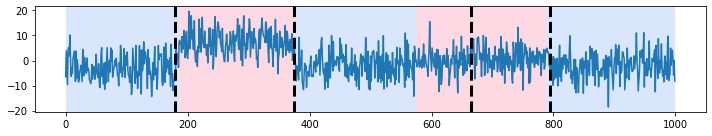

Piecewise linear data: --------------------------------------
Result for KCP cosine:  [595, 610, 650, 950, 1000]


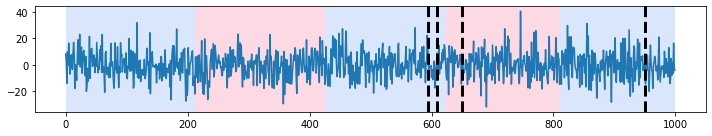

Piecewise 2D Gaussian data: --------------------------------------
Result for KCP cosine:  [155, 190, 305, 320, 500]


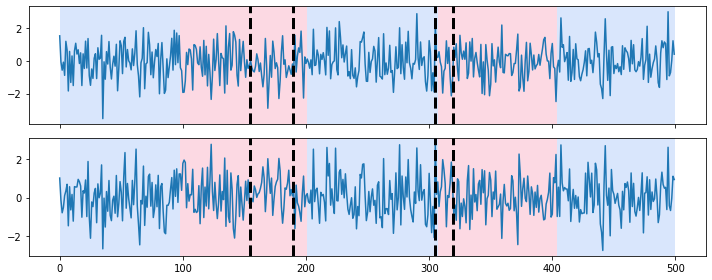

Piecewise sinusoidal data: --------------------------------------
Result for KCP cosine:  [15, 20, 140, 155, 500]


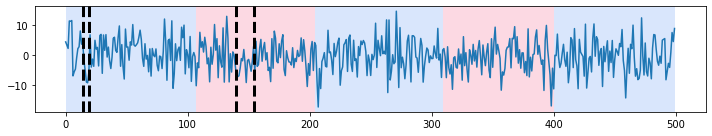

In [15]:
#cosine
#constant data
algo_cosine = rpt.Dynp(model="cosine").fit(signal_c)
result_c = algo_cosine.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for KCP cosine: ", result_c)

rpt.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_cosine = rpt.Dynp(model="cosine").fit(signal_l)
result_l = algo_cosine.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for KCP cosine: ", result_l)

rpt.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_cosine = rpt.Dynp(model="cosine").fit(signal_n)
result_n = algo_cosine.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for KCP cosine: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
algo_cosine = rpt.Dynp(model="cosine").fit(signal_w)
result_w = algo_cosine.predict(n_bkps=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for KCP cosine: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

## Linearly penalized segmentation

3 kinds: linear (l1), piecewise constant (l2), rbf


#### pw_constant data:
- l1, rbf most accurate
- l2 not accurate, generated too many points values

Piecewise constant data: --------------------------------------
Result for pelt l1:  [20, 40, 45, 65, 85, 90, 105, 110, 125, 140, 145, 170, 180, 185, 205, 210, 220, 245, 255, 270, 320, 330, 355, 370, 375, 380, 400, 415, 420, 435, 440, 445, 460, 465, 485, 515, 570, 575, 595, 600, 665, 670, 675, 680, 710, 725, 735, 750, 795, 810, 830, 845, 860, 870, 885, 895, 900, 905, 1000]


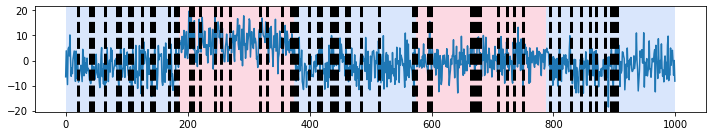

Piecewise linear data: --------------------------------------
Result for pelt l1:  [10, 15, 20, 30, 40, 60, 90, 100, 115, 120, 140, 160, 170, 175, 180, 190, 195, 200, 205, 210, 215, 220, 225, 230, 245, 255, 260, 265, 275, 280, 285, 290, 295, 300, 305, 320, 365, 375, 385, 410, 425, 430, 435, 440, 445, 450, 455, 460, 470, 480, 485, 495, 500, 515, 540, 550, 565, 575, 585, 595, 600, 605, 615, 650, 660, 665, 670, 685, 690, 695, 700, 715, 720, 725, 730, 735, 765, 770, 775, 795, 805, 810, 815, 820, 825, 830, 835, 840, 855, 860, 865, 870, 885, 900, 910, 915, 920, 925, 930, 950, 965, 990, 995, 1000]


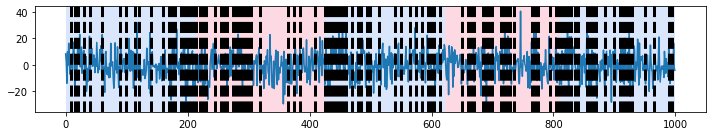

Piecewise 2D Gaussian data: --------------------------------------
Result for pelt l1:  [500]


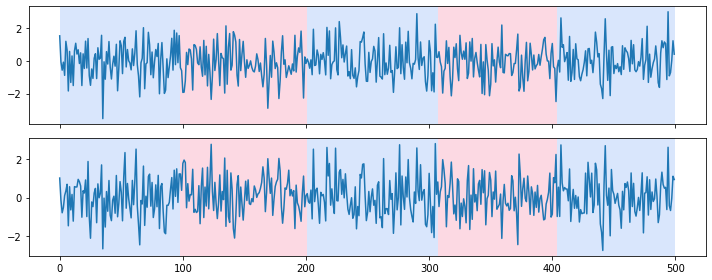

Piecewise sinusoidal data: --------------------------------------
Result for pelt l1:  [5, 10, 15, 20, 45, 50, 65, 80, 95, 100, 110, 115, 140, 145, 175, 180, 190, 205, 210, 220, 225, 230, 235, 240, 245, 275, 280, 285, 315, 330, 350, 355, 360, 370, 395, 400, 425, 430, 465, 480, 485, 495, 500]


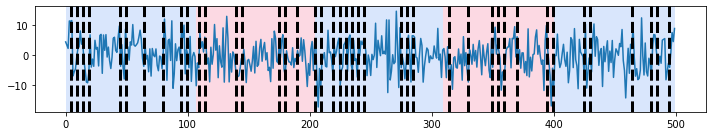

In [16]:
model = "l1" 
#constant 
algo_l1 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_c)
result_c = algo_l1.predict(pen=4)
print("Piecewise constant data: --------------------------------------")
print("Result for pelt l1: ", result_c)

# show results
rpt.display(signal_c, bkps_c, result_c)
plt.show()


#linear
algo_l1 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_l)
result_l = algo_l1.predict(pen=4)
print("Piecewise linear data: --------------------------------------")
print("Result for pelt l1: ", result_l)

rpt.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_l1 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_n)
result_n = algo_l1.predict(pen=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for pelt l1: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data 
algo_l1 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_w)
result_w = algo_l1.predict(pen=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for pelt l1: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

Piecewise constant data: --------------------------------------
Result for pelt l2:  [5, 10, 15, 20, 25, 30, 40, 45, 50, 60, 65, 85, 90, 100, 105, 110, 115, 120, 125, 130, 140, 145, 175, 180, 185, 190, 195, 200, 205, 210, 220, 225, 230, 235, 240, 245, 250, 255, 260, 270, 275, 280, 285, 295, 300, 305, 310, 320, 330, 345, 350, 360, 365, 370, 375, 380, 390, 400, 410, 415, 420, 425, 435, 440, 450, 455, 460, 465, 475, 480, 485, 495, 500, 515, 525, 530, 540, 550, 565, 570, 580, 585, 590, 595, 600, 610, 620, 635, 640, 645, 650, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 725, 730, 735, 740, 750, 755, 760, 765, 795, 805, 810, 825, 830, 835, 845, 855, 860, 865, 875, 880, 885, 890, 900, 905, 915, 925, 945, 950, 955, 965, 980, 985, 990, 1000]


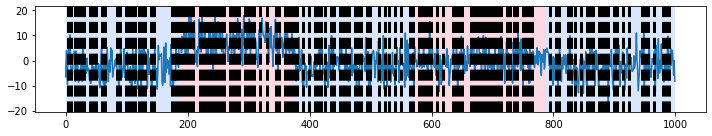

Piecewise linear data: --------------------------------------
Result for pelt l2:  [5, 10, 15, 20, 25, 30, 40, 45, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 115, 120, 130, 135, 140, 145, 155, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 310, 315, 320, 335, 340, 345, 350, 355, 360, 365, 375, 380, 385, 390, 400, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 525, 530, 535, 540, 545, 550, 555, 565, 570, 575, 580, 585, 595, 600, 605, 610, 615, 625, 630, 635, 640, 645, 650, 660, 665, 670, 680, 685, 690, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 810, 815, 820, 825, 830, 835, 840, 855, 860, 865, 870, 875, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 950, 960, 965, 970, 975, 980, 985, 990, 995, 1000]


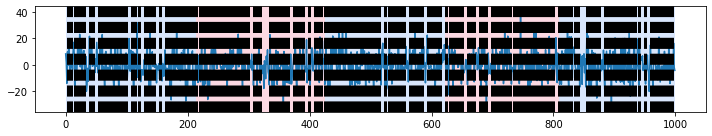

Piecewise 2D Gaussian data: --------------------------------------
Result for pelt l2:  [35, 40, 85, 90, 100, 105, 120, 125, 150, 180, 215, 235, 245, 250, 290, 295, 305, 310, 320, 340, 355, 490, 500]


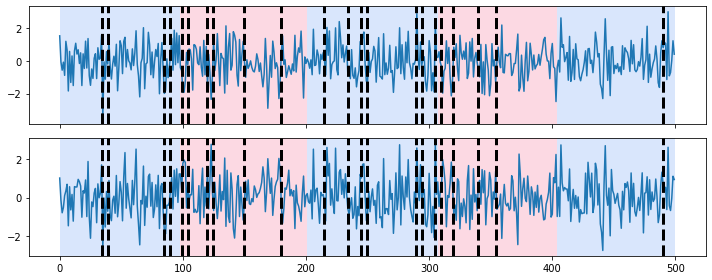

Piecewise sinusoidal data: --------------------------------------
Result for pelt l2:  [5, 10, 15, 20, 25, 35, 40, 45, 50, 55, 60, 65, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 135, 140, 145, 150, 160, 165, 170, 180, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 255, 260, 270, 275, 280, 290, 310, 315, 320, 335, 340, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 410, 415, 420, 425, 430, 440, 450, 455, 460, 465, 480, 485, 495, 500]


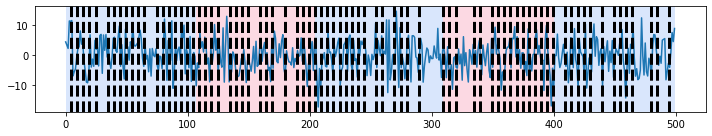

In [17]:
model = "l2"
#constant 
algo_l2 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_c)
result_c = algo_l2.predict(pen=4)
print("Piecewise constant data: --------------------------------------")
print("Result for pelt l2: ", result_c)

# show results
fig, (ax,) = rpt.display(signal_c, bkps_c, result_c)
plt.show()


#linear
algo_l2 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_l)
result_l = algo_l2.predict(pen=4)
print("Piecewise linear data: --------------------------------------")
print("Result for pelt l2: ", result_l)

# show results
fig, (ax,) = rpt.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_l2 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_n)
result_n = algo_l2.predict(pen=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for pelt l2: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data 
algo_l2 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_w)
result_w = algo_l2.predict(pen=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for pelt l2: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()


Piecewise constant data: --------------------------------------
Result for pelt rbf:  [185, 375, 570, 795, 1000]


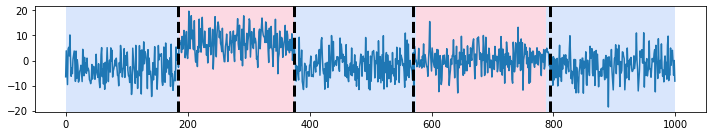

Piecewise linear data: --------------------------------------
Result for pelt rbf:  [1000]


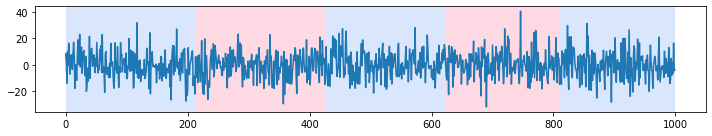

Piecewise 2D Gaussian data: --------------------------------------
Result for pelt rbf:  [100, 200, 305, 405, 500]


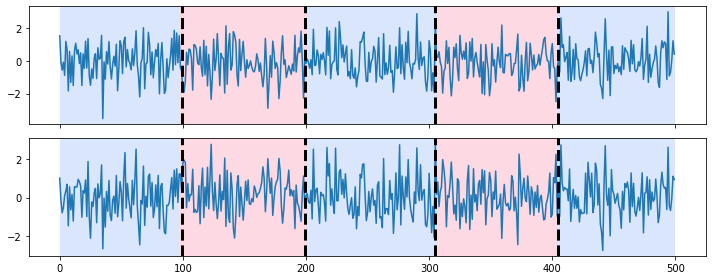

Piecewise sinusoidal data: --------------------------------------
Result for pelt rbf:  [500]


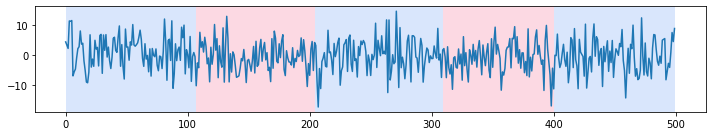

In [18]:
model = "rbf"
#constant 
algo_rbf = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_c)
result_c = algo_rbf.predict(pen=4)
print("Piecewise constant data: --------------------------------------")
print("Result for pelt rbf: ", result_c)

# show results
fig, (ax,) = rpt.display(signal_c, bkps_c, result_c)
plt.show()


#linear
algo_rbf = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_l)
result_l = algo_rbf.predict(pen=4)
print("Piecewise linear data: --------------------------------------")
print("Result for pelt rbf: ", result_l)

# show results
fig, (ax,) = rpt.display(signal_l, bkps_l, result_l)
plt.show()


#normal data
algo_rbf = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_n)
result_n = algo_rbf.predict(pen=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for pelt rbf: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data 
algo_rbf = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_w)
result_w = algo_rbf.predict(pen=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for pelt rbf: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()


## Window-based change point detection

several types: l1, l2, rbf, linear, normal, ar

[204, 413, 608, 796, 1000] 

#### pw_constant data:
- l2, rbf, and normal  most accurate
- ar and l1 slightly accurate 
- l2 not accurate, changepoint values were all small and hardly guessed the right points



Piecewise constant data: --------------------------------------
Result for window l1:  [185, 335, 380, 830, 1000]


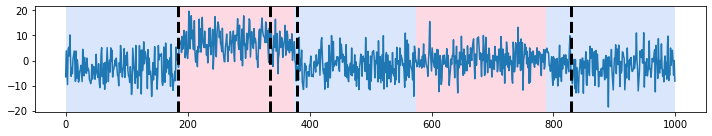

Piecewise linear data: --------------------------------------
Result for window l1:  [235, 435, 615, 860, 1000]


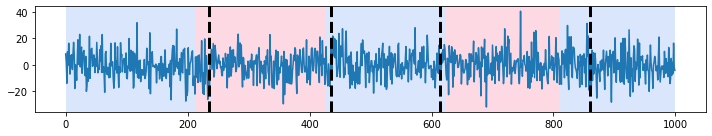

Piecewise 2D Gaussian data: --------------------------------------
Result for window l1:  [25, 90, 305, 415, 500]


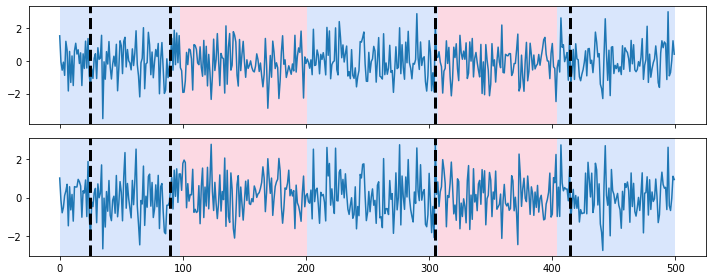

Piecewise sinusoidal data: --------------------------------------
Result for window l1:  [25, 60, 130, 215, 500]


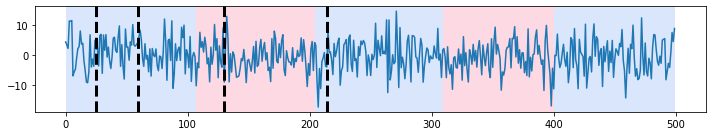

In [19]:
model = "l1"  
#constant data
algo_l1 = rpt.Window(width=40, model=model, jump=5).fit(signal_c)
result_c = algo_l1.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for window l1: ", result_c)

rpt.show.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_l1 = rpt.Window(width=40, model=model, jump=5).fit(signal_l)
result_l = algo_l1.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for window l1: ", result_l)

rpt.show.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_l1 = rpt.Window(width=40, model=model, jump=5).fit(signal_n)
result_n = algo_l1.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for window l1: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
algo_l1 = rpt.Window(width=40, model=model, jump=5).fit(signal_w)
result_w = algo_l1.predict(n_bkps=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for window l1: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

Piecewise constant data: --------------------------------------
Result for window l2:  [185, 375, 795, 830, 1000]


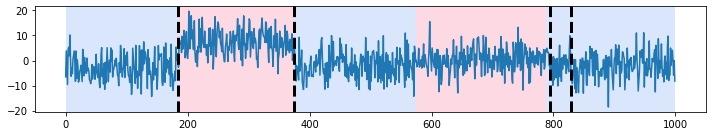

Piecewise linear data: --------------------------------------
Result for window l2:  [195, 290, 435, 465, 1000]


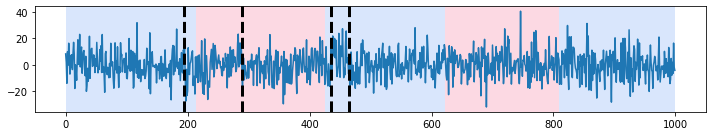

Piecewise 2D Gaussian data: --------------------------------------
Result for window l2:  [90, 160, 235, 320, 500]


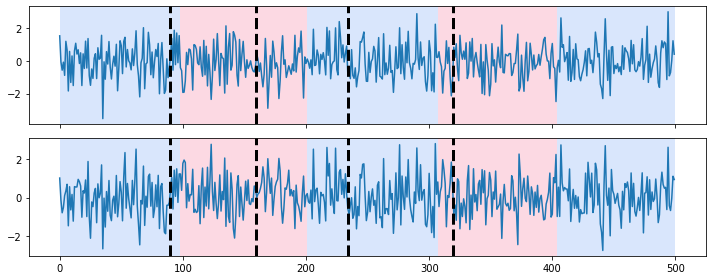

Piecewise sinusoidal data: --------------------------------------
Result for window l2:  [25, 130, 160, 215, 500]


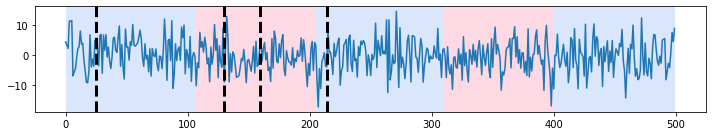

In [20]:
model = "l2" 
algo_l2 = rpt.Window(width=40, model=model, jump=5).fit(signal_c)
result_c = algo_l2.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for window l2: ", result_c)

# show results
rpt.show.display(signal_c, bkps_c, result_c)
plt.show()

algo_l2 = rpt.Window(width=40, model=model, jump=5).fit(signal_l)
result_l = algo_l2.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for window l2: ", result_l)

# show results
rpt.show.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_l2 = rpt.Window(width=40, model=model, jump=5).fit(signal_n)
result_n = algo_l2.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for window l2: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
algo_l2 = rpt.Window(width=40, model=model, jump=5).fit(signal_w)
result_w = algo_l2.predict(n_bkps=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for window l2: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

Piecewise constant data: --------------------------------------
Result for window rbf:  [185, 375, 460, 795, 1000]


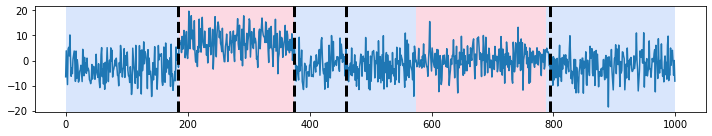

Piecewise linear data: --------------------------------------
Result for window rbf:  [245, 615, 755, 910, 1000]


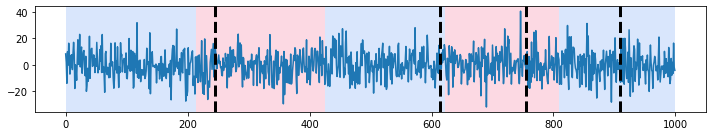

Piecewise 2D Gaussian data: --------------------------------------
Result for window rbf:  [100, 150, 305, 405, 500]


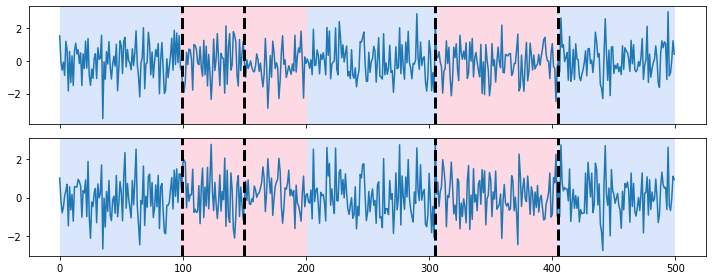

Piecewise sinusoidal data: --------------------------------------
Result for window rbf:  [60, 135, 260, 455, 500]


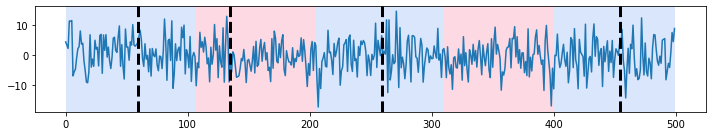

In [21]:
model = "rbf"  
#constant data
algo_rbf = rpt.Window(width=40, model=model, jump=5).fit(signal_c)
result_c = algo_rbf.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for window rbf: ", result_c)

# show results
rpt.show.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_rbf = rpt.Window(width=40, model=model, jump=5).fit(signal_l)
result_l = algo_rbf.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for window rbf: ", result_l)

# show results
rpt.show.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_rbf = rpt.Window(width=40, model=model, jump=5).fit(signal_n)
result_n = algo_rbf.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for window rbf: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
algo_rbf = rpt.Window(width=40, model=model, jump=5).fit(signal_w)
result_w = algo_rbf.predict(n_bkps=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for window rbf: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

Piecewise constant data: --------------------------------------
Result for window linear:  [85, 225, 350, 420, 1000]


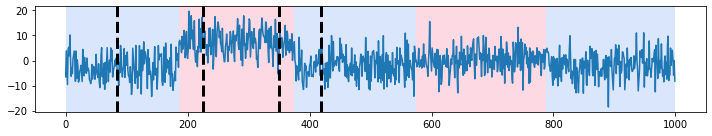

Piecewise linear data: --------------------------------------
Result for window linear:  [195, 225, 845, 970, 1000]


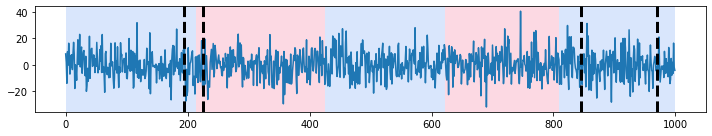

Piecewise 2D Gaussian data: --------------------------------------
Result for window linear:  [100, 200, 310, 405, 500]


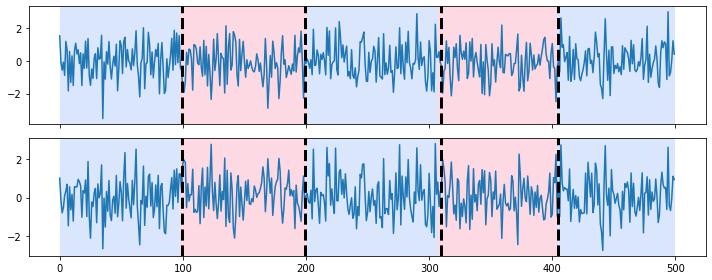

In [22]:
model = "linear"  # "l1", "rbf", "linear", "normal", "ar"
#constant data
algo_linear = rpt.Window(width=40, model=model, jump=5).fit(signal_c)
result_c = algo_linear.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for window linear: ", result_c)

# show results
rpt.show.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_linear = rpt.Window(width=40, model=model, jump=5).fit(signal_l)
result_l = algo_linear.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for window linear: ", result_l)

# show results
rpt.show.display(signal_l, bkps_l, result_l)
plt.show()


#normal data
algo_linear = rpt.Window(width=40, model=model, jump=5).fit(signal_n)
result_n = algo_linear.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for window linear: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
# algo_linear = rpt.Window(width=40, model=model, jump=5).fit(signal_w)
# result_w = algo_linear.predict(n_bkps=4)
# print("Piecewise sinusoidal data: --------------------------------------")
# print("Result for window linear: ", result_w)

# rpt.display(signal_w, bkps_w, result_w)
# plt.show()

Piecewise constant data: --------------------------------------
Result for window normal:  [185, 375, 575, 795, 1000]


C:\Users\emw\AppData\Local\Programs\Python\Python39\lib\site-packages\ruptures\costs\costnormal.py:28: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


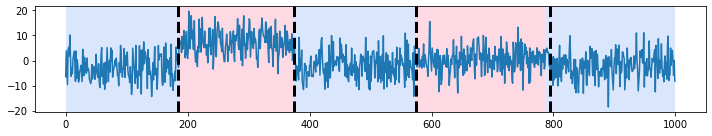

C:\Users\emw\AppData\Local\Programs\Python\Python39\lib\site-packages\ruptures\costs\costnormal.py:28: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


Piecewise linear data: --------------------------------------
Result for window normal:  [170, 245, 290, 465, 1000]


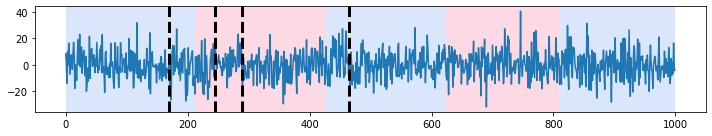

C:\Users\emw\AppData\Local\Programs\Python\Python39\lib\site-packages\ruptures\costs\costnormal.py:28: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


Piecewise 2D Gaussian data: --------------------------------------
Result for window normal:  [100, 200, 310, 405, 500]


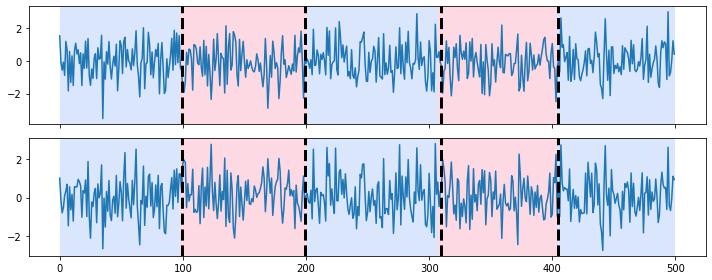

C:\Users\emw\AppData\Local\Programs\Python\Python39\lib\site-packages\ruptures\costs\costnormal.py:28: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


Piecewise sinusoidal data: --------------------------------------
Result for window normal:  [70, 135, 195, 285, 500]


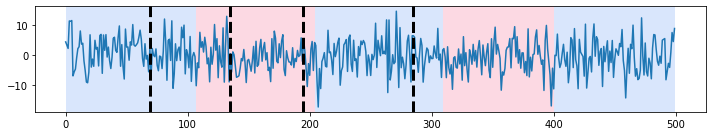

In [23]:
model = "normal"  # "l1", "rbf", "linear", "normal", "ar"
#constant data
algo_norm = rpt.Window(width=40, model=model, jump=5).fit(signal_c)
result_c = algo_norm.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for window normal: ", result_c)

# show results
rpt.show.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_norm = rpt.Window(width=40, model=model, jump=5).fit(signal_l)
result_l = algo_norm.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for window normal: ", result_l)

# show results
rpt.show.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_norm= rpt.Window(width=40, model=model, jump=5).fit(signal_n)
result_n = algo_norm.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for window normal: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
algo_norm = rpt.Window(width=40, model=model, jump=5).fit(signal_w)
result_w = algo_norm.predict(n_bkps=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for window normal: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

Piecewise constant data: --------------------------------------
Result for window ar:  [20, 140, 185, 830, 1000]


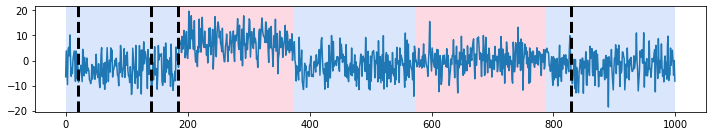

Piecewise linear data: --------------------------------------
Result for window ar:  [195, 375, 465, 835, 1000]


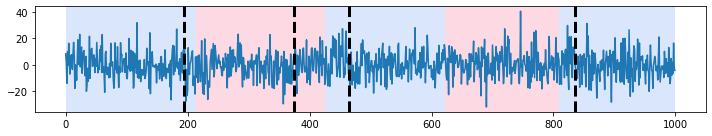

Piecewise 2D Gaussian data: --------------------------------------
Result for window ar:  [35, 75, 135, 215, 500]


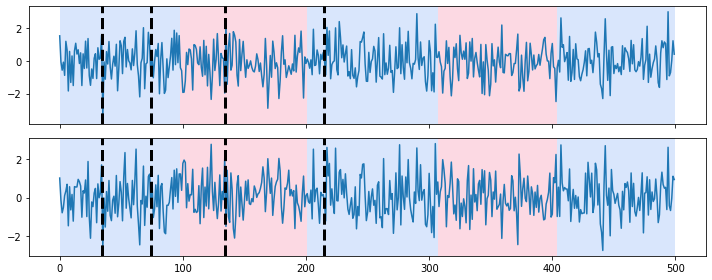

Piecewise sinusoidal data: --------------------------------------
Result for window ar:  [20, 70, 130, 275, 500]


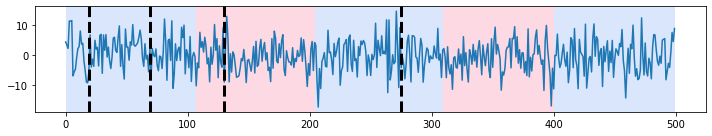

In [24]:
model = "ar"
#constant data 
algo_ar = rpt.Window(width=40, model=model, jump=5).fit(signal_c)
result_c = algo_ar.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for window ar: ", result_c)

# show results
rpt.show.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_ar = rpt.Window(width=40, model=model, jump=5).fit(signal_l)
result_l = algo_ar.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for window ar: ", result_l)

# show results
rpt.show.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_ar= rpt.Window(width=40, model=model, jump=5).fit(signal_n)
result_n = algo_ar.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for window ar: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
algo_ar = rpt.Window(width=40, model=model, jump=5).fit(signal_w)
result_w = algo_ar.predict(n_bkps=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for window ar: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()